### Memory management in R

In [5]:
library(pryr)

Warning message:
"package 'pryr' was built under R version 3.6.3"Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp


In [7]:
object_size(5)    ## Memory allocated for a single numeric vector

56 B

In [8]:
object_size("R")  ## Memory allocated for a single character vector

112 B

In [9]:
object_size(TRUE) ## Memory allocated for a single logical vector

56 B

In [10]:
object_size(1i)   ## Memory allocated for a single complex vector

64 B

In [11]:
vec_length <- 0:60

In [12]:
num_vec_size <- sapply(vec_length, function(x) object_size(seq(x))) # computes the memory requirement for each numeric vector from zero to 60 number of elements

In [13]:
char_vec_size <- sapply(vec_length, function(x) object_size(rep("a",x)))

In [14]:
log_vec_size <- sapply(vec_length, function(x) object_size(rep(TRUE,x)))

In [15]:
comp_vec_size <- sapply(vec_length, function(x) object_size(rep("2i",x)))

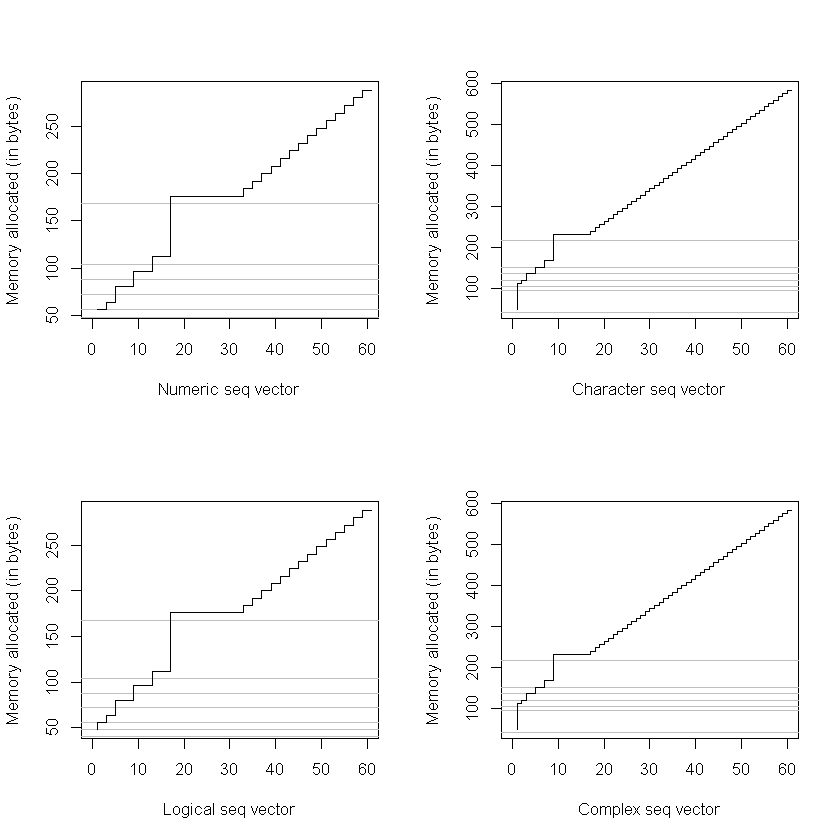

In [25]:
par(mfrow=c(2,2))
plot(num_vec_size ~ vec_length, xlab = "Numeric seq vector", ylab = "Memory allocated (in bytes)", type = "n")
abline(h = (c(0,8,16,32,48,64,128)+40), col = "grey")
lines(num_vec_size, type = "S")
plot(char_vec_size ~ vec_length, xlab = "Character seq vector", ylab = "Memory allocated (in bytes)", type = "n")
abline(h = (c(0,56,64,80,96,112,176)+40), col = "grey")
lines(char_vec_size, type = "S")
plot(log_vec_size ~ vec_length, xlab = "Logical seq vector", ylab = "Memory allocated (in bytes)", type = "n")
abline(h = (c(0,8,16,32,48,64,128)+40), col = "grey")
lines(log_vec_size, type = "S")
plot(comp_vec_size ~ vec_length, xlab = "Complex seq vector", ylab = "Memory allocated (in bytes)", type = "n")
abline(h = (c(0,56,64,80,96,112,176)+40), col = "grey")
lines(comp_vec_size, type = "S")

### System runtime in R

In [26]:
# Aggregate function
Agg <- aggregate(mpg~carb,data=mtcars,mean)

In [27]:
## Plyr package
library(plyr)
DDply <- ddply( mtcars, .(carb),function(x) mean(x$mpg))

In [28]:
## Data.table format
library(data.table)
mtcars_tb <- data.table(mtcars)
setkey(mtcars_tb,carb)
mtcars_tb[,mean(mpg),by=carb]


Attaching package: 'data.table'

The following object is masked from 'package:pryr':

    address



carb,V1
1,25.34286
2,22.40000
3,16.30000
4,15.79000
6,19.70000
8,15.00000


In [29]:
## Summarize function
library(dplyr)
summarize(group_by(mtcars, carb), mean(mpg))


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



carb,mean(mpg)
1,25.34286
2,22.40000
3,16.30000
4,15.79000
6,19.70000
8,15.00000


In [32]:
library(microbenchmark)
MB_res <- microbenchmark(
  Aggregate_func=aggregate(mpg~carb,data=mtcars,mean),
  Ddply_func=ddply( mtcars, .(carb),function(x) mean(x$mpg)),
  Data_table_func = mtcars_tb[,mean(mpg),by=carb],
  Group_by_func = summarize(group_by(mtcars, carb), mean(mpg)),
  times=1000
)

Warning message:
"package 'microbenchmark' was built under R version 3.6.3"

In [33]:
MB_res

expr,time
Ddply_func,6595104
Data_table_func,10111963
Aggregate_func,2587834
Aggregate_func,3264889
Data_table_func,3325549
Group_by_func,1587417
Group_by_func,2329331
Aggregate_func,2617231
Data_table_func,6046368
Group_by_func,1562220


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Coordinate system already present. Adding new coordinate system, which will replace the existing one.


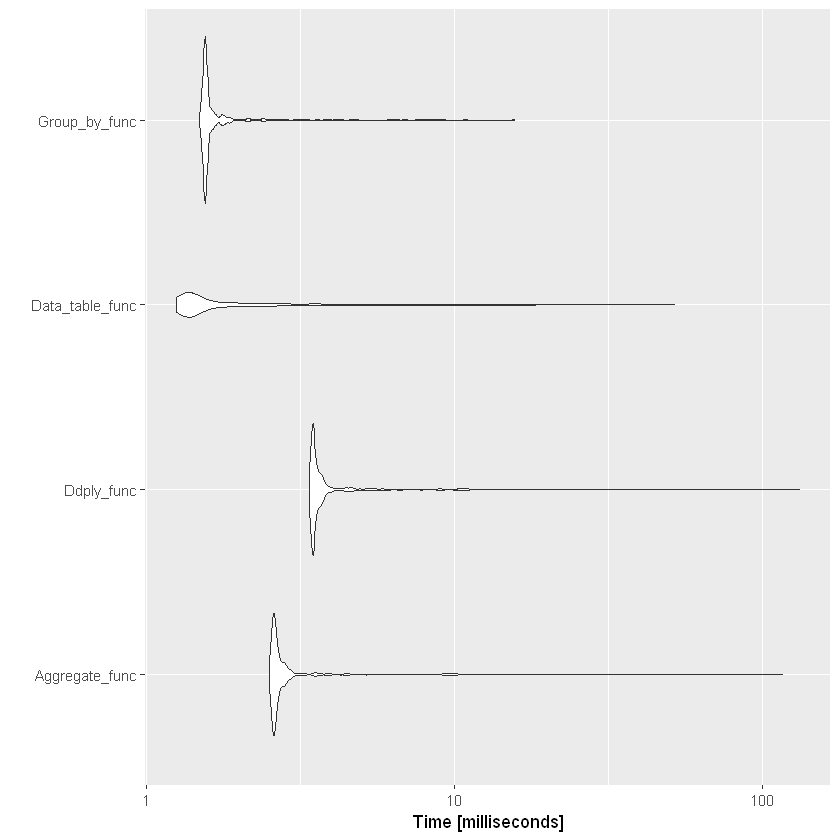

In [34]:
library(ggplot2)
autoplot(MB_res)

### Classifying algorithms as best, worst, and average case 
* Best case: A best case is one which requires the least running time. For example-a vector with all elements arranged in increasing order requires the least amount of time for sorting.
* Worst case: A worst case is one which requires the maximum possible runtime to complete sorting a vector. For example-a vector with all the elements sorted in decreasing order requires the most amount of time for sorting.
* Average case: An average case is one which requires an intermediate time to complete sorting a vector. For example-a vector with half elements sorted in increasing order and the remaining in decreasing order. An average case is assessed using multiple vectors of differently arranged elements.

### Algorithm asymptotic analysis

* Constant: $O(1)$
* Linear: $O(n)$
* Quadratic: $O(2^n)$
* $i^{th}$ order: $O(n^i)$
* Logarithmic: $O(log_2n)$
* $n log_2(n)$: $O(n log_2n)$
* Polynomial of order $i$: $n^{O(i)}$
* Exponential: $2^{O(n)}$ OR $O(2^n)$

### Classifying rules for two algebraic growth rate functions f(n) and g(n) are evaluated using the limit theorem
* $ \lim_{n\to \infty} \frac{f(n)}{g(n)}$ = $ \frac {\lim_{n\to \infty} f(n)} {\lim_{n\to \infty} g(n)} $
* The following three scenarios are used to classify f(n) and g(n):
> * if limit tends to infinity: then, $f(n)$ has faster growth rate than $g(n)$
> * if limit tends to zero: then, $f(n)$ has slower growth rate than $g(n)$
> * if limit tends to a constant greater than zero: then, $f(n)$ has a comparable growth rate as $g(n)$

### Computation evaluation of a program

Component 1 - Assignment operator: $ \theta (1) $

In [35]:
int_Vector <- 0:60

Component 2 - Simple loop: $\theta(n)$

In [38]:
a <- 0
n <- 100
for(i in 1:n) a <- a + i

Component 3 - Complex loop: $ \theta(On^2) $

In [39]:
a <- 1
i <- 1
b <- list()
while(i<=n )
{
a <- a + i
i<- i+1
}
for(j in 1:i)
for(k in 1:i)
{
  b[[j]] <- a+j*k
}

Component 4 - Loops with conditional statements: $ \theta(On^2) $

In [40]:
a <- 1
for(i in 1:n) {
if(i <= n/2) {
for(j in 1:i)
a <- a+i
}else{
a <- a*i
}
}

Component 5 - Recursive statements: $ \theta (1) $

In [41]:
fact_n <- 1
for(i in 2:n) {
fact_n <- fact_n * i
}